In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install langgraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.9/154.9 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 2.1 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 25.0
    Uninstalling packaging-25.0:
      Successfully uninstalled packaging-25.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datasets 3.6.0 requires fsspec[http]<=2025.3.0,>=2023.1.0, but you have fsspec 2025.3.2 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is inco

In [3]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [4]:
class AgentState(TypedDict):
    number1: int
    operation: str
    number2: int
    finalNumber: int

In [5]:
def adder(state: AgentState) -> AgentState:
    """This node will add two numbers"""
    state["finalNumber"] = state["number1"] + state["number2"]
    return state

def substractor(state: AgentState) -> AgentState:
    """This node will substract two numbers"""
    state["finalNumber"] = state["number1"] - state["number2"]
    return state

def decide_next_node(state: AgentState) -> AgentState:
    """This node will select the next node of the graph"""
    if state["operation"] == "+":
        return "addition_operation" # this will be the name of the edge
    elif state["operation"] == "-":
        return "substracion_operation" # this will be the name of the edge

In [6]:
graph = StateGraph(AgentState)

graph.add_node("add_node", adder)
graph.add_node("substract_node", substractor)
graph.add_node("router", lambda state:state) # here it is saying that the passing state won't shange inside the function

graph.add_edge(START, "router")

graph.add_conditional_edges(
    "router",
    decide_next_node,
    {
        #edge : node
        "addition_operation" : "add_node",
        "substracion_operation" : "substract_node"        
    }
)

graph.add_edge("add_node", END)
graph.add_edge("substract_node", END)

app = graph.compile()

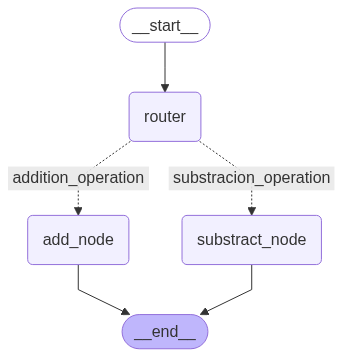

In [7]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png(
)))

In [8]:
initial_state_1 = AgentState({"number1" : 10, "operation" : "-", "number2" : 5})
print(app.invoke(initial_state_1)["finalNumber"])

5


In [9]:
initial_state_2 = AgentState({"number1" : 10, "operation" : "+", "number2" : 5})
print(app.invoke(initial_state_2)["finalNumber"])

15
